In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ba809f84a2edb2f0ac3f3f43124f13b


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mansar
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | tias
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | grimshaw
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | aflu
City not found. Skipping...
Processing Record 15 of Set 1 | santa isabel
Processing Record 16 of Set 1 | nyurba
Processing Record 17 of Set 1 | palana
Processing Record 18 of Set 1 | atasu
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | saint-joseph
Processing Record 22 of Set 1 | a

Processing Record 35 of Set 4 | bursol
City not found. Skipping...
Processing Record 36 of Set 4 | massaguet
Processing Record 37 of Set 4 | floresta
Processing Record 38 of Set 4 | kitui
Processing Record 39 of Set 4 | melivoia
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | bengkulu
Processing Record 42 of Set 4 | whithorn
Processing Record 43 of Set 4 | chauny
Processing Record 44 of Set 4 | huambo
Processing Record 45 of Set 4 | sciacca
Processing Record 46 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 47 of Set 4 | tiarei
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | jujuy
City not found. Skipping...
Processing Record 50 of Set 4 | markova
Processing Record 1 of Set 5 | millbrook
Processing Record 2 of Set 5 | morros
Processing Record 3 of Set 5 | shimoda
Processing Record 4 of Set 5 | san carlos de bariloche
Processing Record 5 of Set 5 | mumford
Processing Record 6 of Set 5 | pangai
Processing Record 7 of 

Processing Record 23 of Set 8 | levikha
Processing Record 24 of Set 8 | babstovo
Processing Record 25 of Set 8 | morondava
Processing Record 26 of Set 8 | tura
Processing Record 27 of Set 8 | launceston
Processing Record 28 of Set 8 | cumberland
Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | portland
Processing Record 31 of Set 8 | namibe
Processing Record 32 of Set 8 | millington
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | acajutla
Processing Record 35 of Set 8 | ahja
Processing Record 36 of Set 8 | vanavara
Processing Record 37 of Set 8 | newport
Processing Record 38 of Set 8 | kapoeta
Processing Record 39 of Set 8 | yilan
Processing Record 40 of Set 8 | selma
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 44 of Set 8 | herat
Processing Record 45 of Set 8 | hun
Processing Record 46 of Set 8 

Processing Record 9 of Set 12 | codrington
Processing Record 10 of Set 12 | moa
Processing Record 11 of Set 12 | alihe
Processing Record 12 of Set 12 | xingyi
Processing Record 13 of Set 12 | buy
Processing Record 14 of Set 12 | barkhan
Processing Record 15 of Set 12 | acari
Processing Record 16 of Set 12 | norton shores
Processing Record 17 of Set 12 | oktyabrskiy
Processing Record 18 of Set 12 | paris
Processing Record 19 of Set 12 | hirara
Processing Record 20 of Set 12 | marabba
Processing Record 21 of Set 12 | san vicente
Processing Record 22 of Set 12 | abapo
Processing Record 23 of Set 12 | siddapur
Processing Record 24 of Set 12 | solnechnyy
Processing Record 25 of Set 12 | buritama
Processing Record 26 of Set 12 | visnes
Processing Record 27 of Set 12 | susuman
Processing Record 28 of Set 12 | san andres
Processing Record 29 of Set 12 | katangli
Processing Record 30 of Set 12 | vila velha
Processing Record 31 of Set 12 | mersing
Processing Record 32 of Set 12 | sabanalarga
Pro

In [24]:
len(city_data)

567

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mansar,21.4000,79.2500,62.60,77,9,3.20,IN,2021-01-24 22:36:05
1,Vaini,-21.2000,-175.2000,82.40,78,75,5.75,TO,2021-01-24 22:34:25
2,Ribeira Grande,38.5167,-28.7000,64.40,94,75,19.57,PT,2021-01-24 22:34:21
3,Albany,42.6001,-73.9662,19.99,43,40,1.01,US,2021-01-24 22:34:20
4,Ushuaia,-54.8000,-68.3000,53.60,71,90,11.50,AR,2021-01-24 22:34:16
5,Tias,28.9611,-13.6450,64.40,82,0,13.80,ES,2021-01-24 22:36:05
6,Kapaa,22.0752,-159.3190,78.80,78,75,13.80,US,2021-01-24 22:33:59
7,Torbay,47.6666,-52.7314,26.01,84,73,3.00,CA,2021-01-24 22:35:03
8,Grimshaw,56.1834,-117.6027,1.40,71,75,9.22,CA,2021-01-24 22:36:06
9,Bambous Virieux,-20.3428,57.7575,77.00,88,75,4.56,MU,2021-01-24 22:34:19


In [26]:
# Rearrange column orders in dataframe.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mansar,IN,2021-01-24 22:36:05,21.4000,79.2500,62.60,77,9,3.20
1,Vaini,TO,2021-01-24 22:34:25,-21.2000,-175.2000,82.40,78,75,5.75
2,Ribeira Grande,PT,2021-01-24 22:34:21,38.5167,-28.7000,64.40,94,75,19.57
3,Albany,US,2021-01-24 22:34:20,42.6001,-73.9662,19.99,43,40,1.01
4,Ushuaia,AR,2021-01-24 22:34:16,-54.8000,-68.3000,53.60,71,90,11.50


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

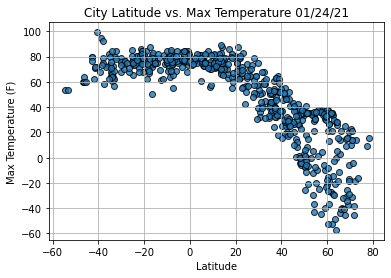

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

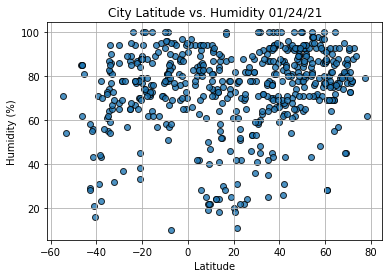

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

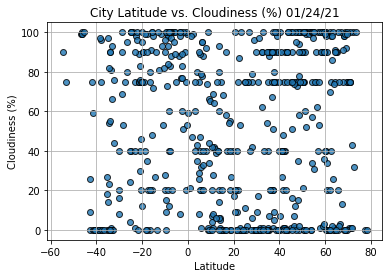

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

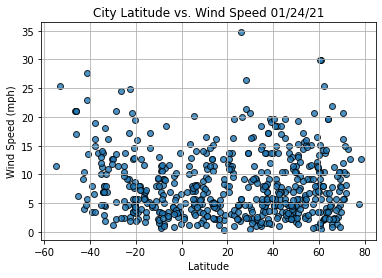

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                       Nyurba
Country                        RU
Date          2021-01-24 22:36:06
Lat                       63.2842
Lng                       118.332
Max Temp                   -48.91
Humidity                       75
Cloudiness                     26
Wind Speed                   4.12
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mansar,IN,2021-01-24 22:36:05,21.4000,79.2500,62.60,77,9,3.20
2,Ribeira Grande,PT,2021-01-24 22:34:21,38.5167,-28.7000,64.40,94,75,19.57
3,Albany,US,2021-01-24 22:34:20,42.6001,-73.9662,19.99,43,40,1.01
5,Tias,ES,2021-01-24 22:36:05,28.9611,-13.6450,64.40,82,0,13.80
6,Kapaa,US,2021-01-24 22:33:59,22.0752,-159.3190,78.80,78,75,13.80


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

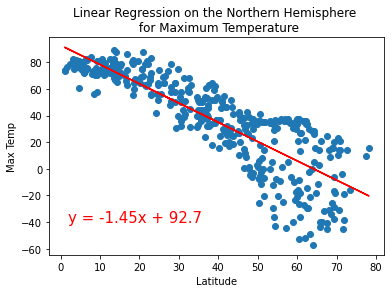

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(2,-40))

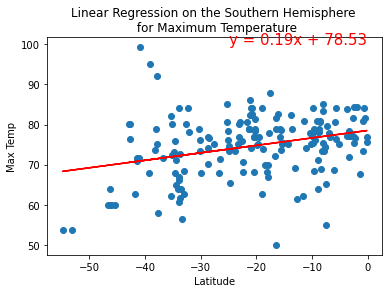

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,100))

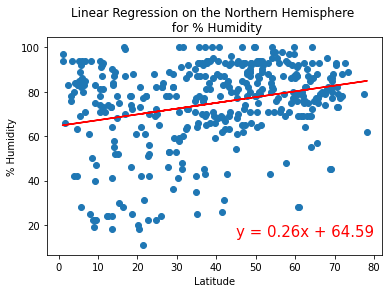

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

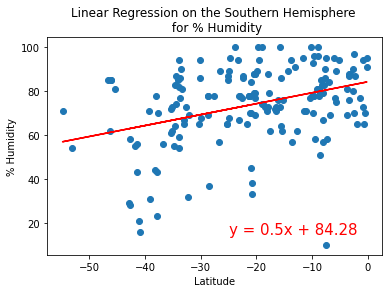

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

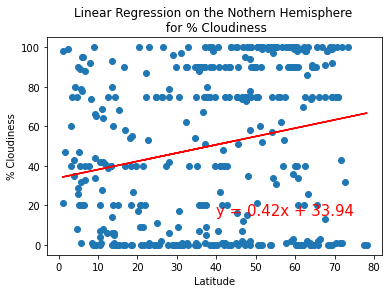

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nothern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,15))

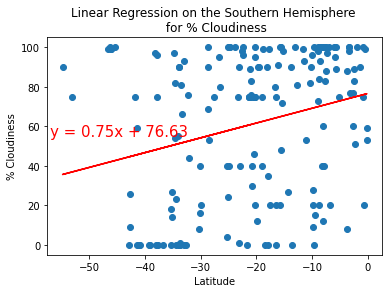

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,55))

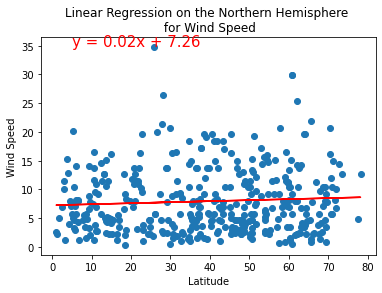

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,35))

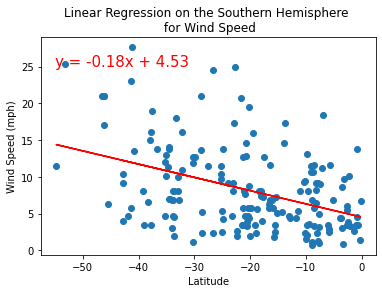

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,25))